# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [8]:
import numpy as np
import pandas as pd
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# H_0 = Your null hypothesis

# There is no statistically significant difference between the response rates of the old template and the new template.

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [24]:
# H_1 = Your alternative hypothesis

# There is a statistically significant difference between the response rates of the old and new templates.

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [71]:
# Calculate the required sample size
resp_rate = 0.05
std_dev = 0.0475
rate_diff = 0.01

def effect_size(rate_diff):
    result = ((1+rate_diff/resp_rate)*resp_rate - resp_rate)/std_dev
    return result

print(effect_size(rate_diff))

power_analysis = TTestIndPower()
power_analysis.solve_power(effect_size(rate_diff), alpha=.05, power=.8)

0.2105263157894736


355.14275443426556

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

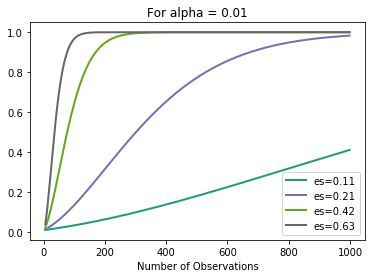

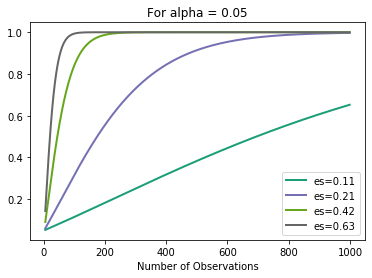

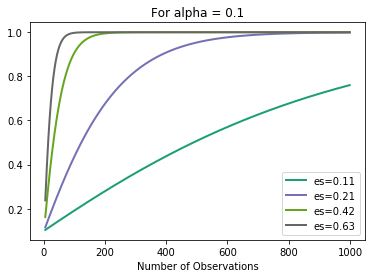

In [73]:
#Your code; plot power curves for the various alpha and effect size combinations
alpha_vals = [0.01, 0.05, 0.1]

effect_sizes = [effect_size(0.005), effect_size(0.01), effect_size(0.02), effect_size(0.03)]

for a in alpha_vals:
    power_analysis.plot_power(dep_var='nobs',
                              nobs = np.array(range(5,1000)),
                              effect_size=np.array(effect_sizes),
                              alpha=a,
                              title='For alpha = '+str(a))
plt.show()

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [74]:
# It really depends on the size of the mailing list. If it's on the order of thousands, 
# then we want to limit the sample size as much as we can, and should probably go with an 
# alpha of 0.05, power of 0.8 and therefore nobs of ~300. If the mailing list is on the order
# of tens or hundreds of thousands, we can safely run an experiment with an alpha of 0.01, power
# of 0.8 and therefore a larger sample size of around 500. If our mailing list is really small,
# say around 1000, then we can even go with an alpha of 0.1 to reduce the risk of losing out on 
# any sales, in which case we could do with a nobs of ~225.

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.